In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [41]:
math_data = pd.read_csv('./math-achievement-sch-sy2015-16.csv', low_memory=False)
arts_data = pd.read_csv('./rla-achievement-sch-sy2015-16.csv', low_memory=False)

## Problem 1

In [5]:
fiscal_data = pd.read_csv('./Sdf16_1a.txt', sep='\t', low_memory=False)

Ranking of states by total federal funding:

STNAME
Vermont                  111891000
Wyoming                  123012000
Delaware                 144707000
North Dakota             155453000
New Hampshire            169166000
Maine                    186523000
Rhode Island             188204000
South Dakota             196644000
Montana                  220340000
District of Columbia     226202000
Idaho                    248546000
Hawaii                   261131000
Alaska                   307320000
Nebraska                 346826000
West Virginia            360283000
Nevada                   405789000
Utah                     419642000
Kansas                   453922000
Iowa                     464852000
Connecticut              484186000
New Mexico               516289000
Oregon                   582560000
Arkansas                 606946000
Minnesota                685055000
Mississippi              690724000
Oklahoma                 703225000
Colorado                 721719000
Wis

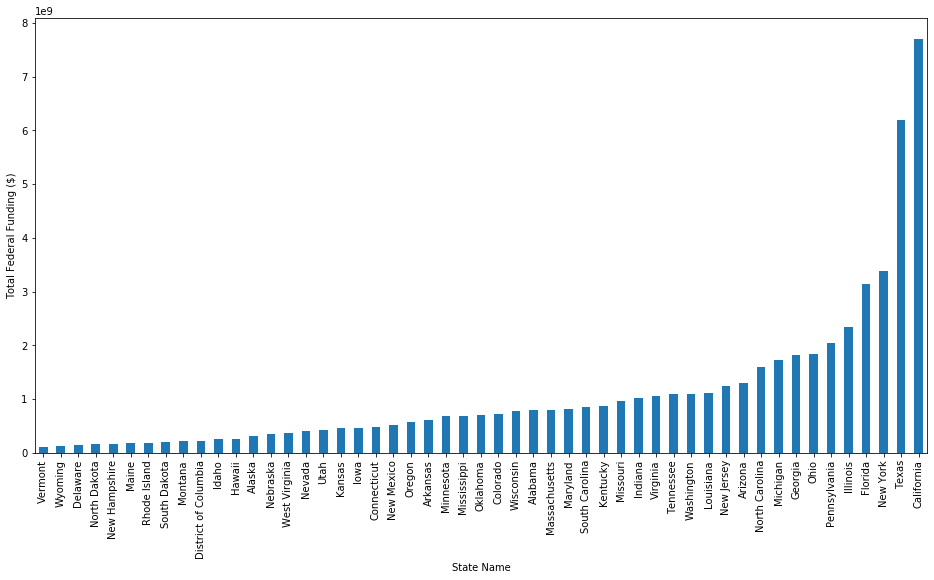

In [6]:
condition = (fiscal_data['TFEDREV']>0)
total_fedrev = fiscal_data[condition].groupby('STNAME')['TFEDREV'].sum().sort_values()

print('Ranking of states by total federal funding:\n')
print(total_fedrev, end='\n\n')

plt.figure(figsize=(16,8))
total_fedrev.plot.bar()
plt.xlabel('State Name')
plt.ylabel('Total Federal Funding ($)');

In [7]:
## Or 'TOTALEXP'

condition = ((fiscal_data['V33']>0) & (fiscal_data['TFEDREV']>0))
avg_fedrev = (
    fiscal_data
    .loc[condition,['TFEDREV','V33','STNAME']]
    .groupby('STNAME')
    .sum()
)
avg_fedrev['FEDREV_PS'] = avg_fedrev['TFEDREV']/avg_fedrev['V33']

print('Ranking of states by federal funding per student:')
avg_fedrev['FEDREV_PS'].sort_values()

Ranking of states by federal funding per student:


STNAME
Vermont                  522.064223
Utah                     647.982669
Iowa                     724.263505
Minnesota                724.605380
Colorado                 775.893944
Michigan                 821.254731
Pennsylvania             824.053831
Virginia                 824.426779
Massachusetts            837.010752
Idaho                    851.553770
Nevada                   868.237439
New Jersey               877.228346
Connecticut              903.842131
Wisconsin                911.593612
Kansas                   916.005610
Washington               930.943158
Indiana                  931.212627
Oregon                   933.838920
Maryland                 936.763816
New Hampshire            940.572790
Ohio                    1005.517091
Oklahoma                1008.192141
North Carolina          1028.727054
Maine                   1029.576113
Georgia                 1031.580392
Nebraska                1036.603685
Missouri                1045.362288
Illinois             

## Problem 2

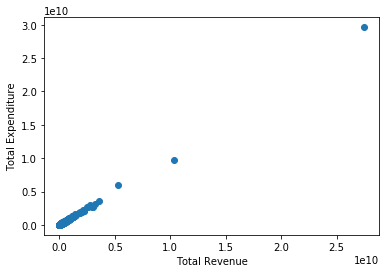

Ranking of states by debt per student:


STNAME
Arkansas                  55.510848
Kentucky                  58.774265
Tennessee                 94.398330
Wisconsin                103.665563
Iowa                     104.204397
Texas                    110.359253
Oklahoma                 112.218429
Illinois                 113.742436
Kansas                   131.640193
Oregon                   145.571553
South Dakota             150.175716
Virginia                 185.631094
Washington               265.801263
Alabama                  346.284944
New York                 504.916474
North Carolina           506.761787
Montana                  543.625086
Minnesota                746.329846
Nebraska                 764.693409
Alaska                   968.643614
District of Columbia    1285.117970
North Dakota            1611.360914
Name: DEBT_PS, dtype: float64

In [48]:
condition = (fiscal_data['TOTALREV']>0) & (fiscal_data['TOTALEXP']>0) & (fiscal_data['V33']>0)
exp_rev = (
    fiscal_data
    .assign(DEBT = fiscal_data['TOTALEXP'] - fiscal_data['TOTALREV'])
    .loc[:,['DEBT','STNAME','V33']]
    .groupby('STNAME')
    .sum()
)

plt.scatter(fiscal_data.loc[condition,'TOTALREV'], fiscal_data.loc[condition,'TOTALEXP'])
plt.xlabel('Total Revenue')
plt.ylabel('Total Expenditure')
plt.show()

exp_rev['DEBT_PS'] = exp_rev['DEBT']/exp_rev['V33']

print('Ranking of states by debt per student:')
exp_rev.query('DEBT_PS>0')['DEBT_PS'].sort_values()

## Problem 3

In [100]:
# If a number if less than or less than or equal to, then we either decrease the number by 2 or make it 0, whichever is maxmimum
# If a number if greater than or greater than or equal to, then we either increase the number by 2 or make it 100, whichever is minimum
# Any data point containing a hyphen will be the average of 2 numbers in the string

def data_processing(df, col_name):
    col = df[col_name]
    new_col = []
    for x in col:
        if x=='PS':
            num = np.nan
        elif bool(re.search('[a-zA-Z]', x)):
            expr, num = x[0:2], int(x[2:])
            if expr in ['LE','LT']:
                num = max(num - 2,0)
            elif expr in ['GE','GT']:
                num = min(num + 2,100)
        elif bool(re.search('-', x)):
            num1, num2 = [int(y) for y in x.split('-')]
            num = round((num1+num2)/2)
        else:
            num = int(x)
        new_col.append(num)
    df[col_name+'_proc'] = new_col
    return df

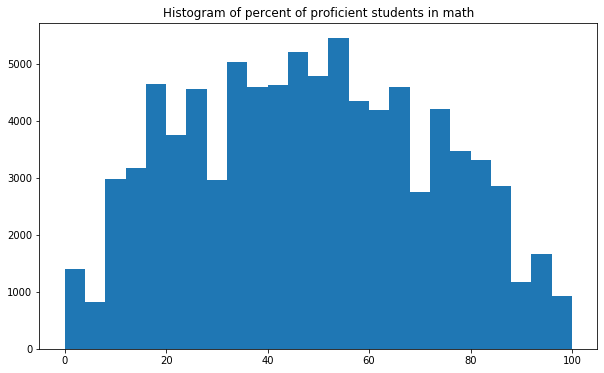

In [101]:
math_data = data_processing(math_data, 'ALL_MTH00PCTPROF_1516')
plt.figure(figsize=(10,6))
plt.hist(math_data['ALL_MTH00PCTPROF_1516_proc'].dropna(), bins=25)
plt.title('Histogram of percent of proficient students in math');

## Problem 4

In [66]:
condition = fiscal_data['TFEDREV']>0
cut_amount = int((fiscal_data.loc[condition, 'TFEDREV'].sum())*0.15)
print('15% of the U.S. federal budget currently being spent on funding school districts:', cut_amount)

15% of the U.S. federal budget currently being spent on funding school districts: 8340411300


In [95]:
condition = (fiscal_data['TOTALREV']>0) & (fiscal_data['TOTALEXP']>0)
cut_rev = fiscal_data.assign(DEBT = fiscal_data['TOTALEXP'] - fiscal_data['TOTALREV']).query('DEBT<0')
cut_rev['DEBT'] = -cut_rev['DEBT']
available_amount = cut_rev['DEBT'].sum()
cut_rev['CUT'] = (cut_amount/available_amount)*cut_rev['DEBT']
cut_rev['CUT'] = round(cut_rev['CUT'])
cut_rev[['LEAID','CUT']]

,LEAID,CUT
1,0100005,891226.0
3,0100007,769226.0
4,0100008,1409951.0
7,0100012,118161.0
21,0100030,830669.0
36,0100060,789313.0
60,0100195,156563.0
62,0100210,964191.0
63,0100240,1239209.0
64,0100270,11330421.0


## Problem 5

Selected the school districts whose expenditure is less than funding. Cutting equal amount of funds from all the selected districts will be biased for the ones with lower funding. So, an equal proportion of funding was cut down from each of the districts to reduce the total federal funding by 15%.